In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.tsa.stattools

In [2]:
def testenorma(x):
    e,p=stats.shapiro(x)
    texto='A série NÃO é normal'
    if p>=0.05:
        texto='A série É normal' 
    return texto

In [3]:
def testeestacionario(x):
    kpssx=statsmodels.tsa.stattools.kpss(x)
    valorcritico=kpssx[3]['5%']
    teste=kpssx[0]
    if teste>valorcritico:
        texto='A série NÃO estacionária'
    else:
        texto='A série É estacionária'
    return texto

In [4]:
ser=pd.read_csv('AirPassengers.csv')
ser

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
ser=pd.Series(data=ser["#Passengers"].values,index=pd.to_datetime(ser["Month"]))

In [6]:
ser

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

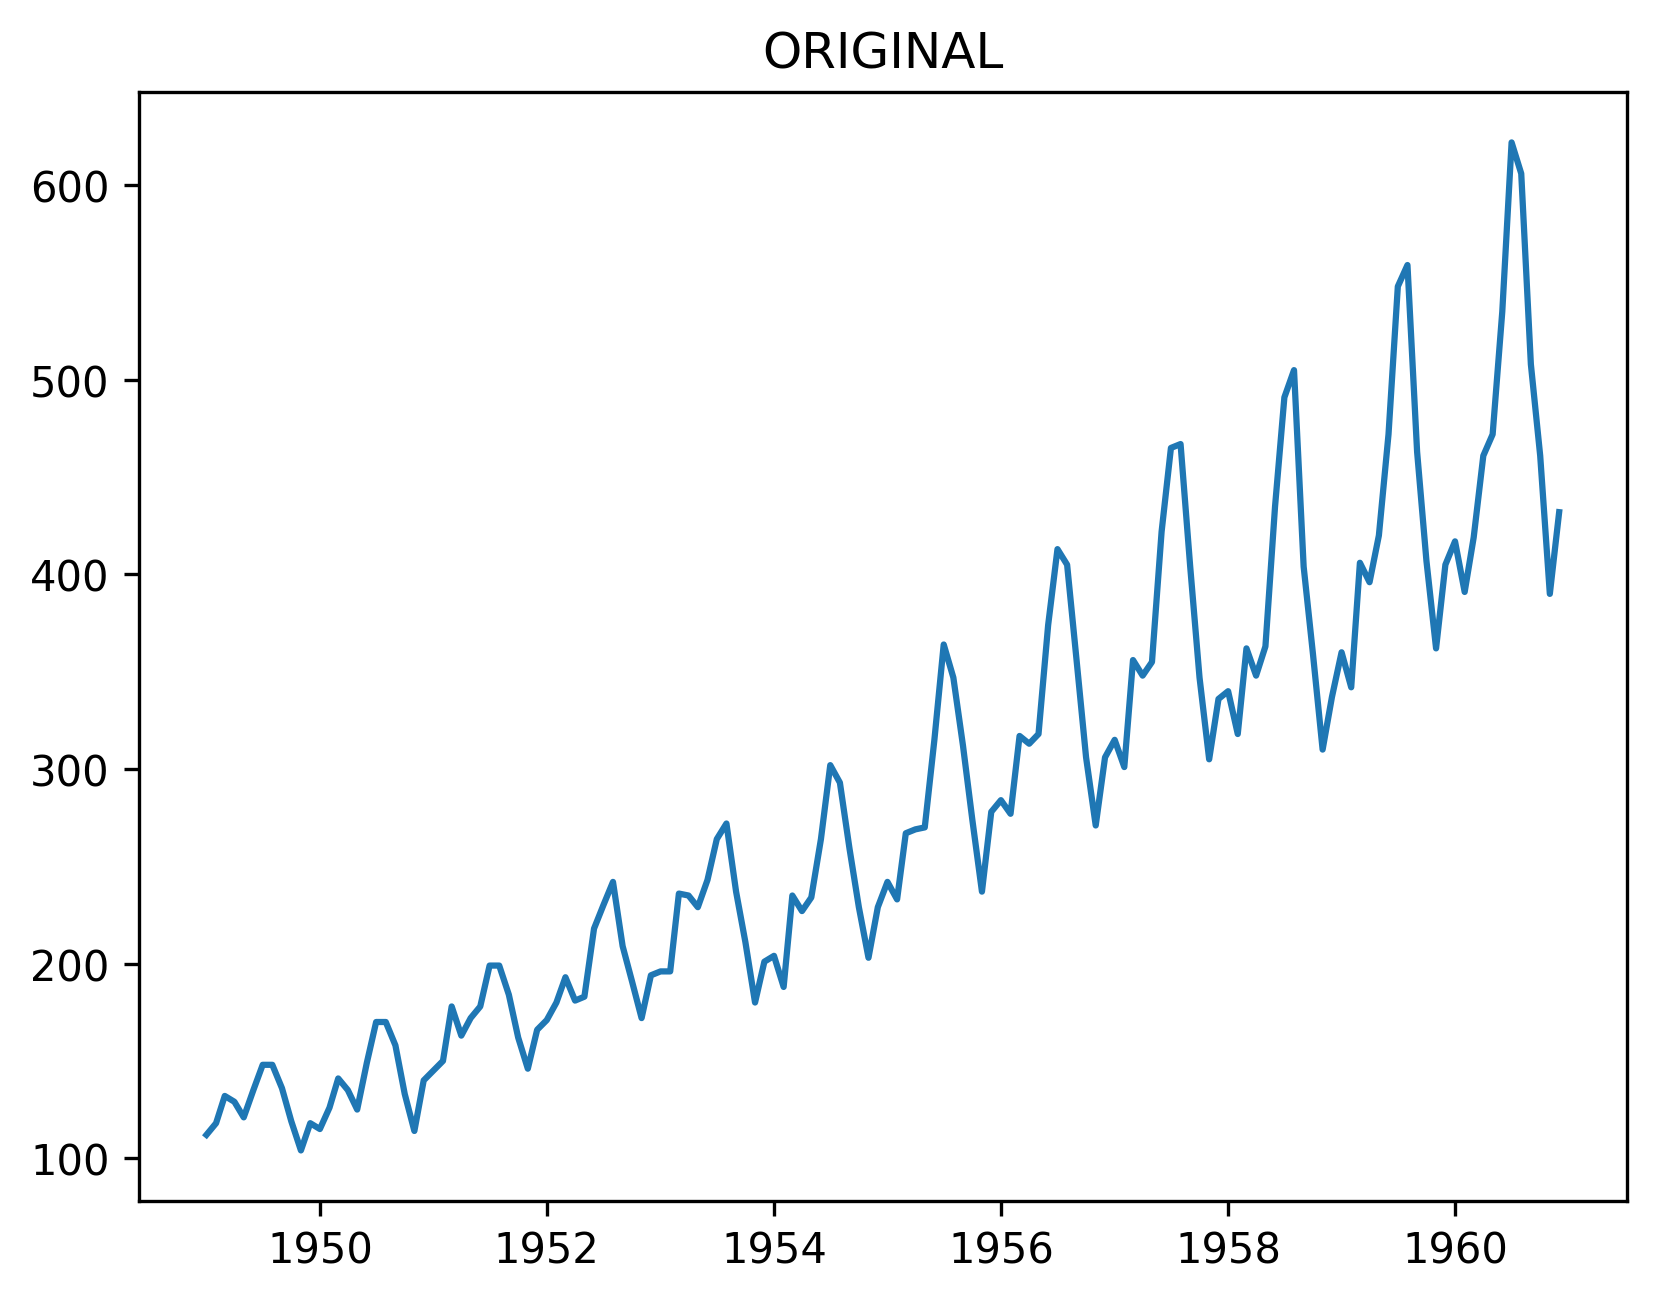

In [7]:
plt.figure(dpi=300)
plt.plot(ser)
plt.title("ORIGINAL")
plt.show()

In [8]:
testenorma(ser)

'A série NÃO é normal'

In [9]:
testeestacionario(ser)

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_143/597850919.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série NÃO estacionária'

In [10]:
ser2=np.log(ser)

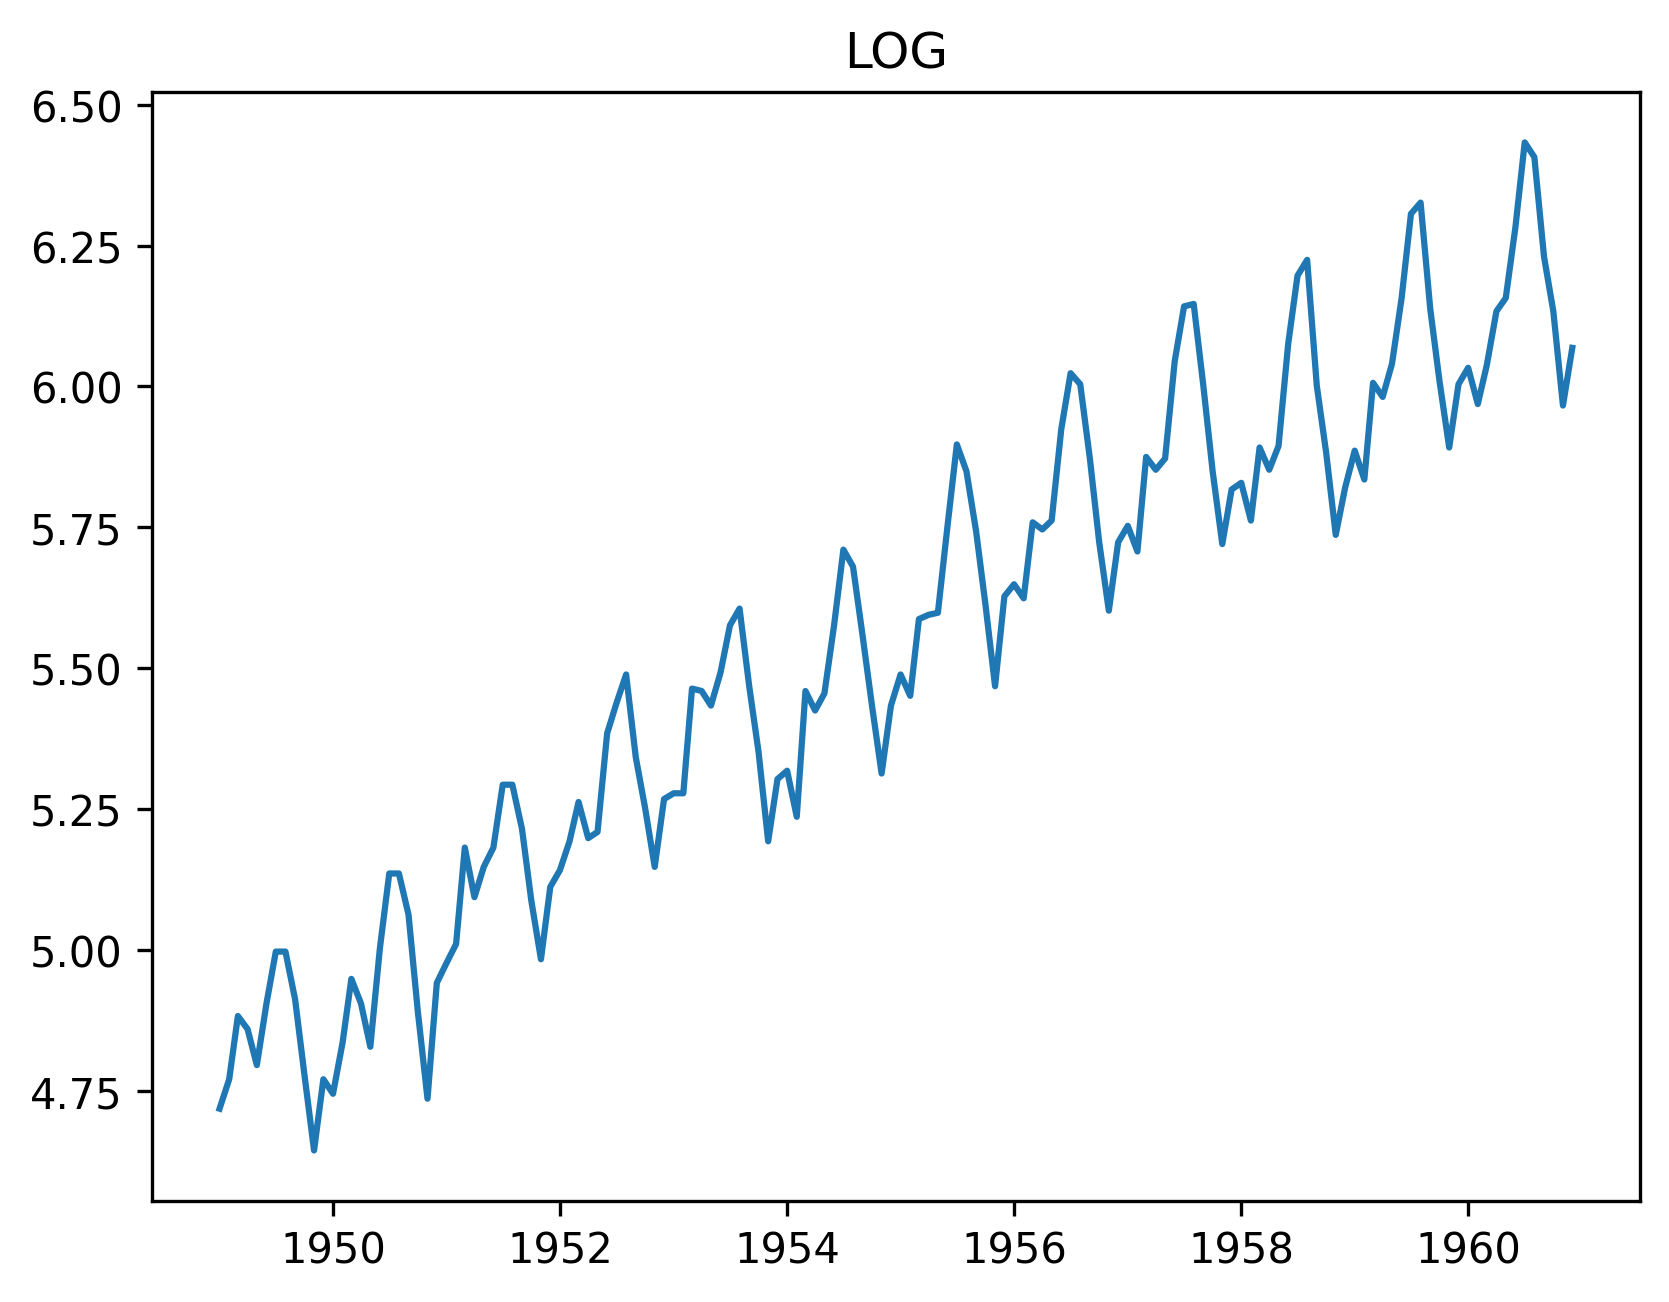

In [11]:
plt.figure(dpi=300)
plt.plot(ser2)
plt.title("LOG")
plt.show()

In [12]:
testenorma(ser2)

'A série NÃO é normal'

In [13]:
testeestacionario(ser2)

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_143/597850919.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série NÃO estacionária'

In [14]:
ser3=ser**(1/3)

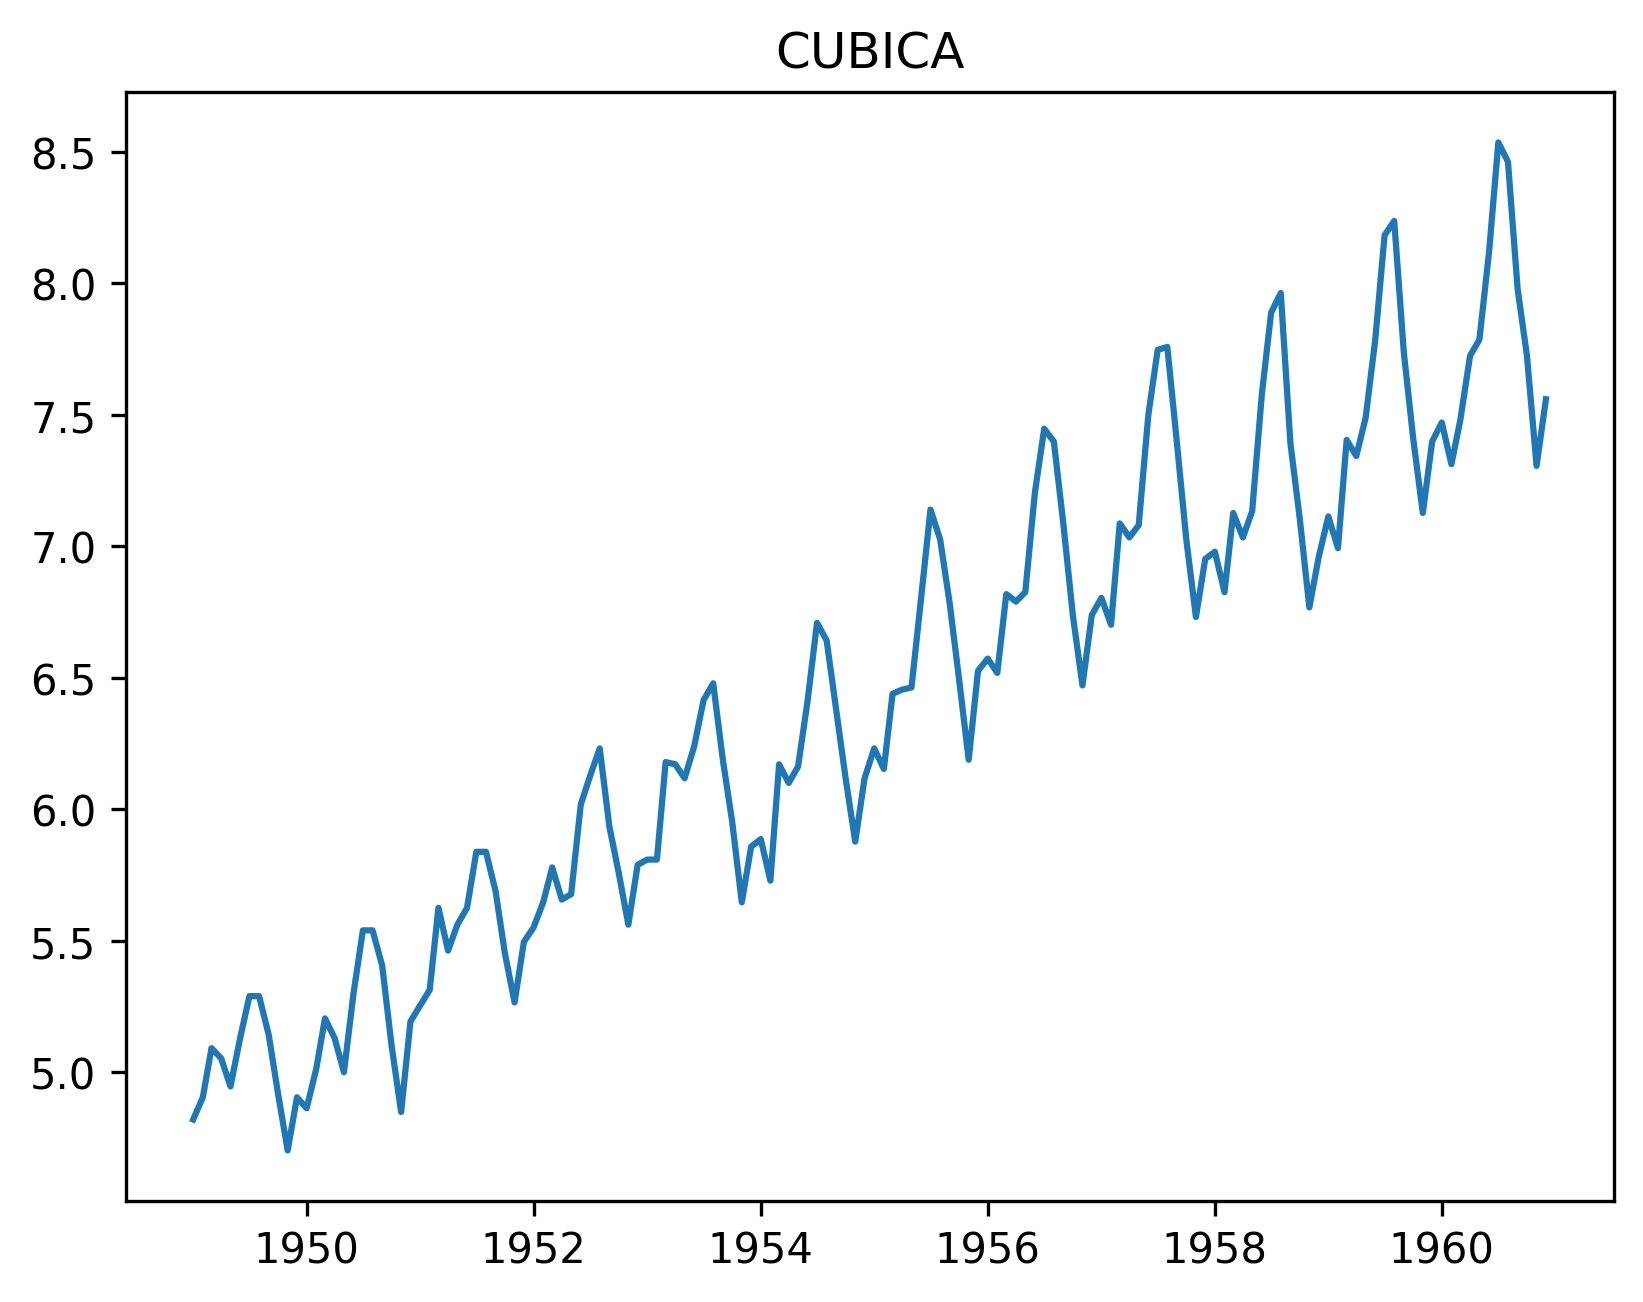

In [15]:
plt.figure(dpi=300)
plt.plot(ser3)
plt.title("CUBICA")
plt.show()

In [16]:
testenorma(ser3)

'A série NÃO é normal'

In [17]:
testeestacionario(ser3)

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_143/597850919.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série NÃO estacionária'

# Diferenças

In [18]:
ser.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
dtype: int64

In [19]:
ser.shift(2).head(10)

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01    112.0
1949-04-01    118.0
1949-05-01    132.0
1949-06-01    129.0
1949-07-01    121.0
1949-08-01    135.0
1949-09-01    148.0
1949-10-01    148.0
dtype: float64

In [20]:
ser_diff=ser-ser.shift(1)
ser_diff2=ser2-ser2.shift(1)
ser_diff3=ser3-ser3.shift(1)

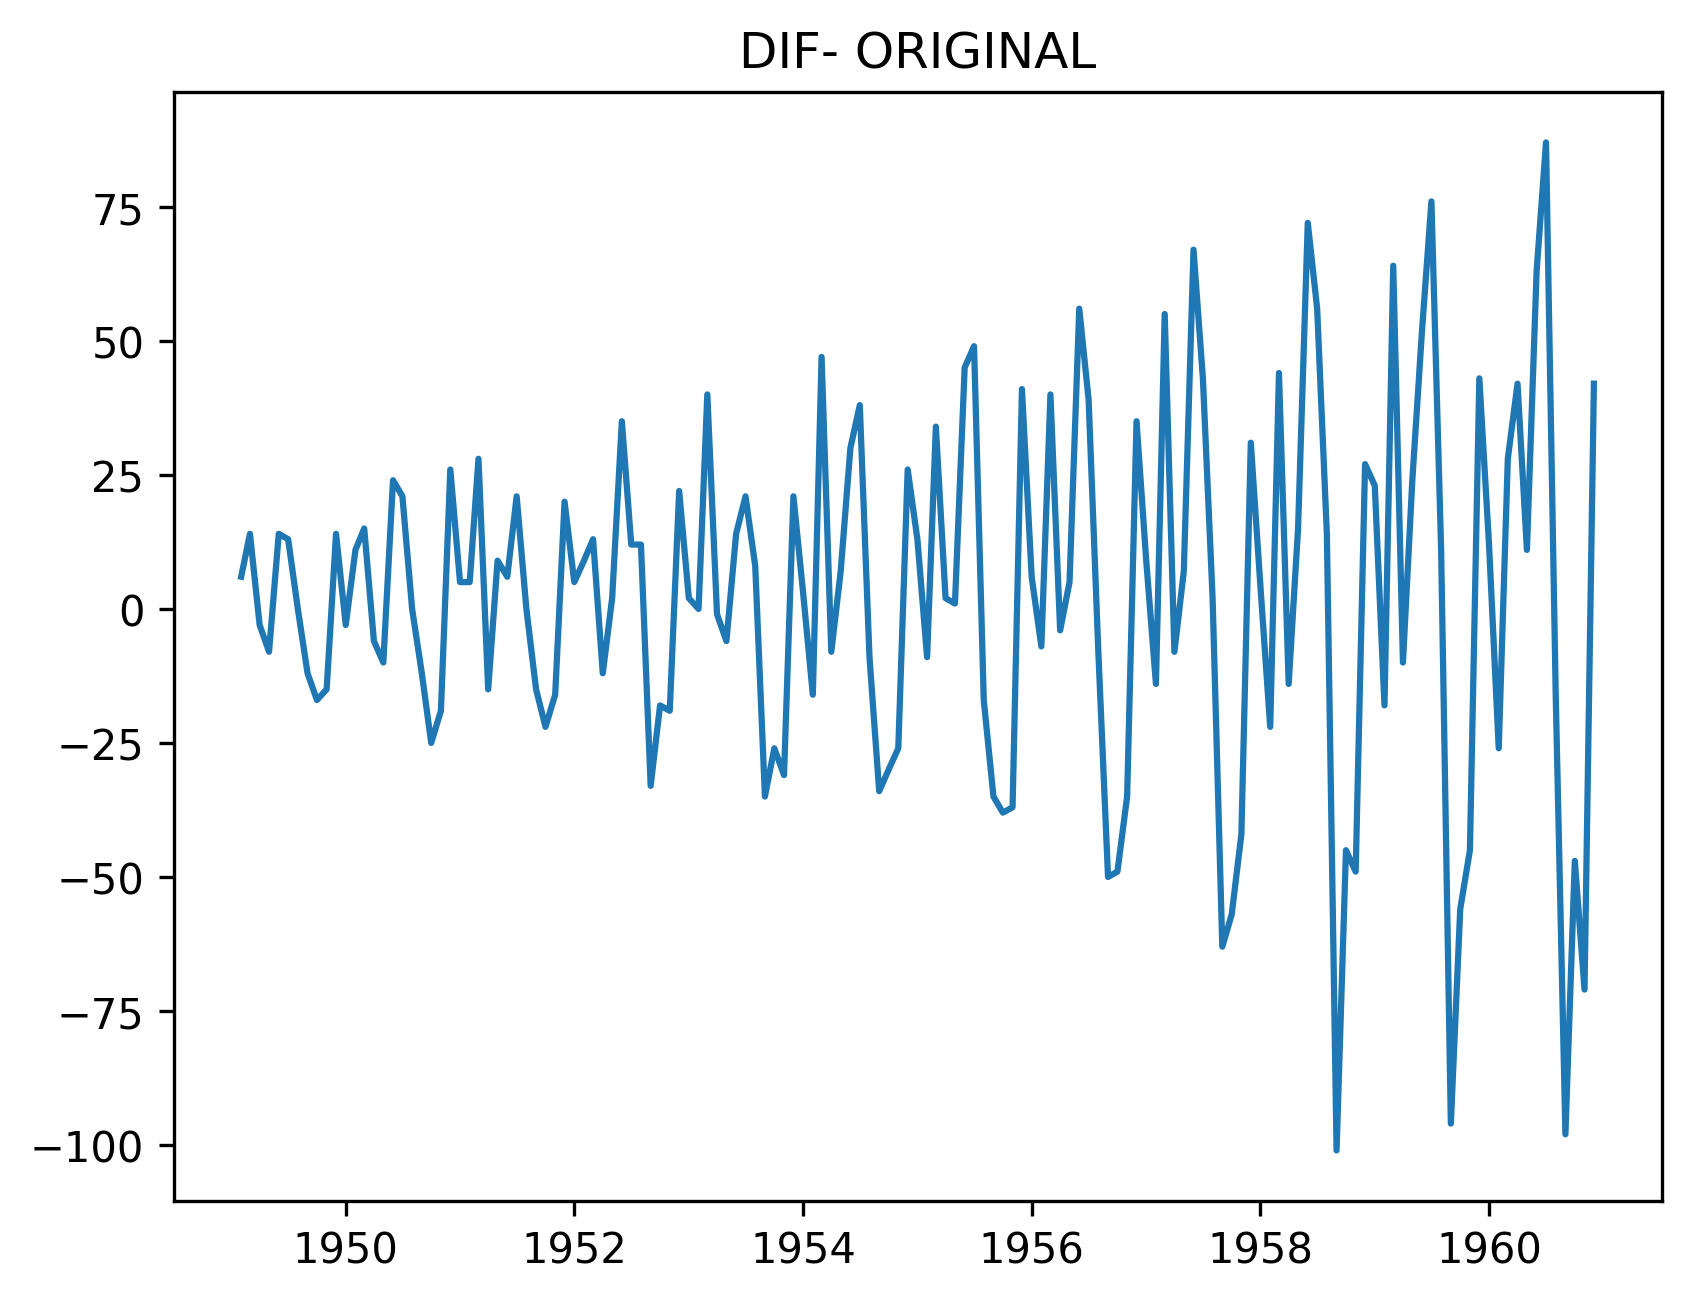

In [21]:
plt.figure(dpi=300)
plt.plot(ser_diff)
plt.title("DIF- ORIGINAL")
plt.show()

In [22]:
testenorma(ser_diff.dropna())
testeestacionario(ser_diff.dropna())

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_143/597850919.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série É estacionária'

In [23]:
testenorma(ser_diff.dropna())

'A série É normal'

(array([ 3.,  0.,  0.,  1.,  3.,  6.,  3., 10.,  9., 19., 16., 18., 18.,
        10.,  6., 11.,  4.,  3.,  2.,  1.]),
 array([-101. ,  -91.6,  -82.2,  -72.8,  -63.4,  -54. ,  -44.6,  -35.2,
         -25.8,  -16.4,   -7. ,    2.4,   11.8,   21.2,   30.6,   40. ,
          49.4,   58.8,   68.2,   77.6,   87. ]),
 <BarContainer object of 20 artists>)

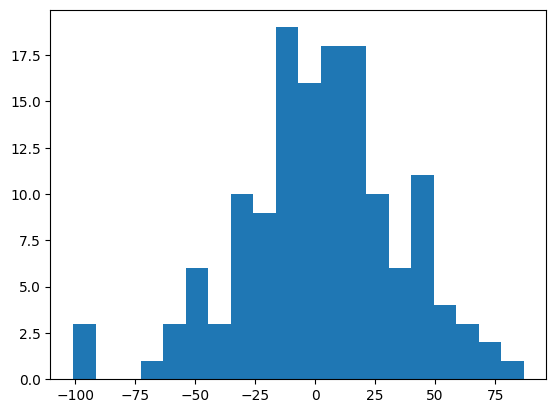

In [24]:
plt.hist(ser_diff.dropna(),bins=20)

In [25]:
testenorma(ser_diff2.dropna())

'A série NÃO é normal'

In [26]:
testeestacionario(ser_diff2.dropna())

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_143/597850919.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série É estacionária'

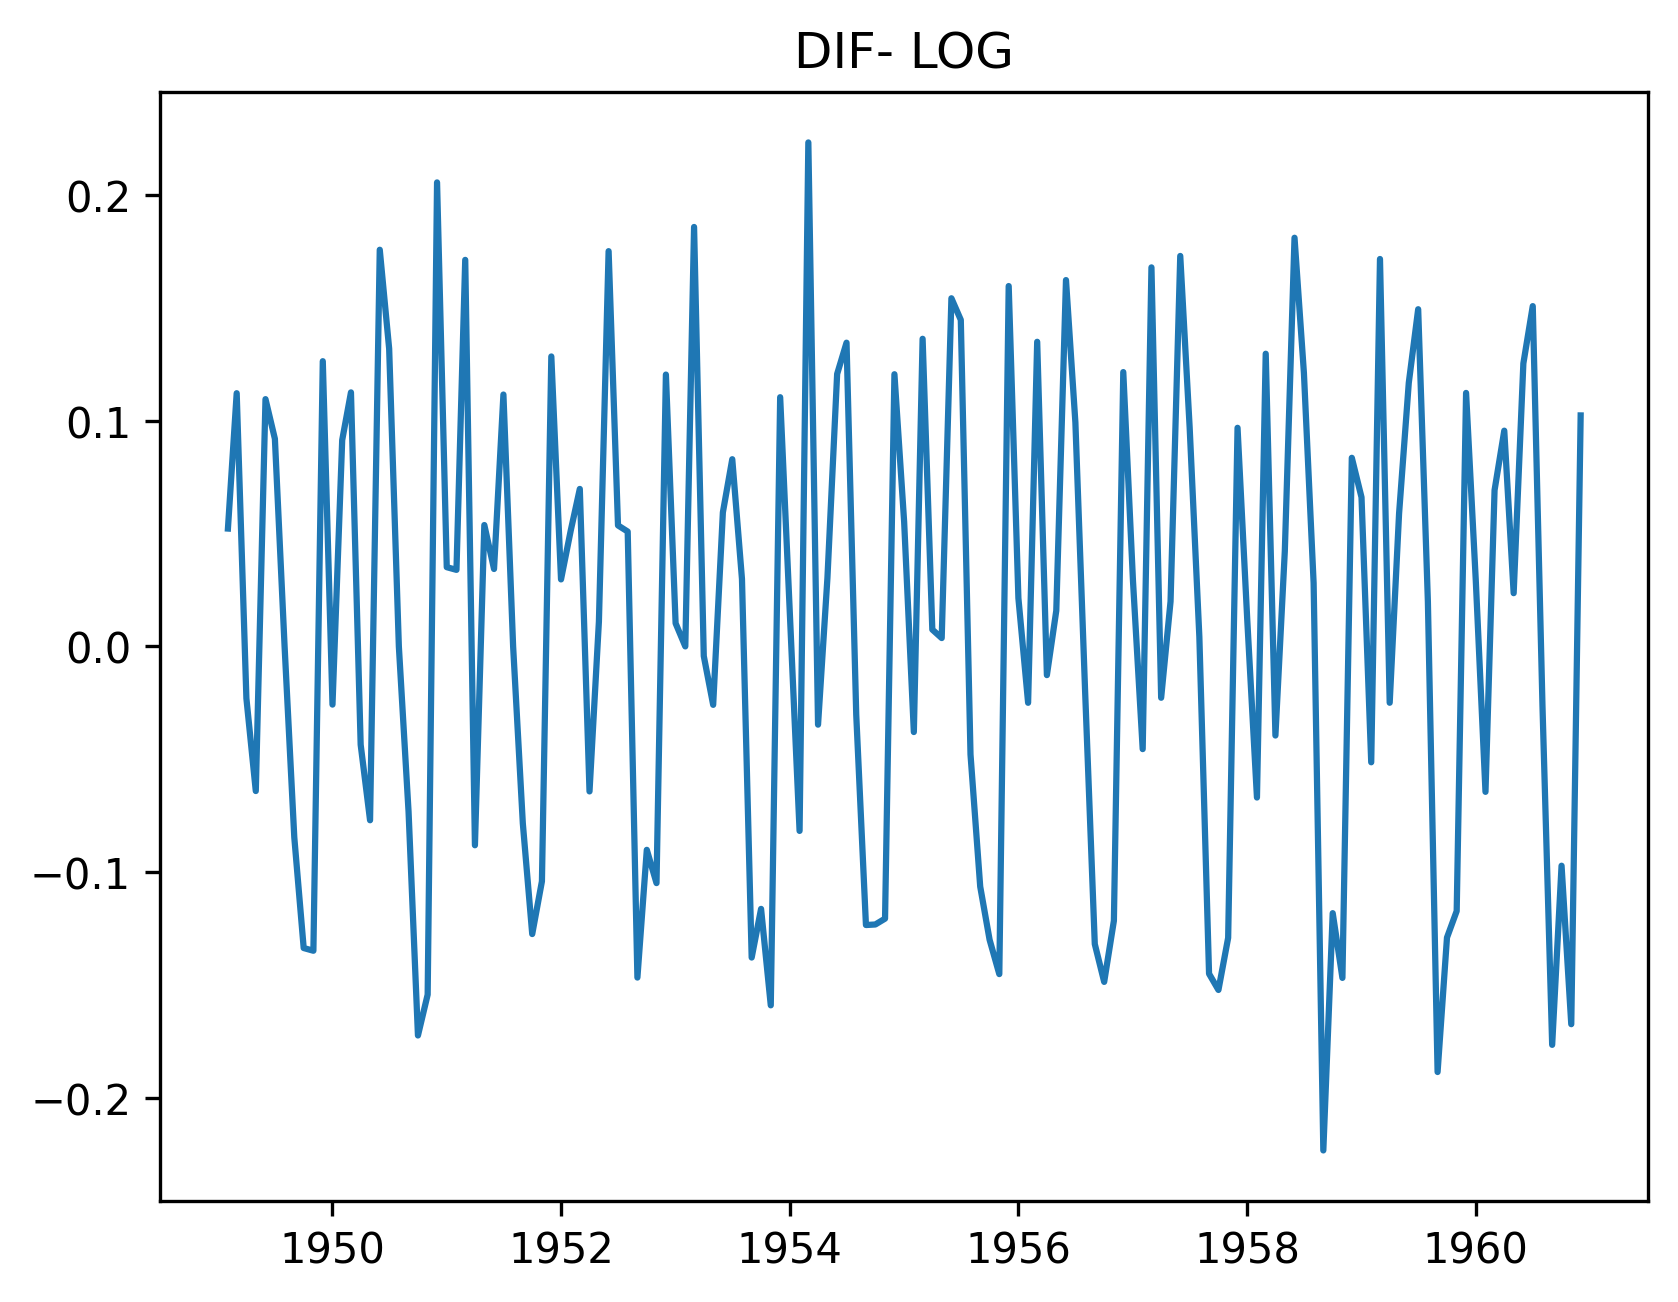

In [27]:
plt.figure(dpi=300)
plt.plot(ser_diff2)
plt.title("DIF- LOG")
plt.show()

In [28]:
testenorma(ser_diff3.dropna())

'A série NÃO é normal'

In [29]:
testeestacionario(ser_diff3.dropna())

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_143/597850919.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série É estacionária'

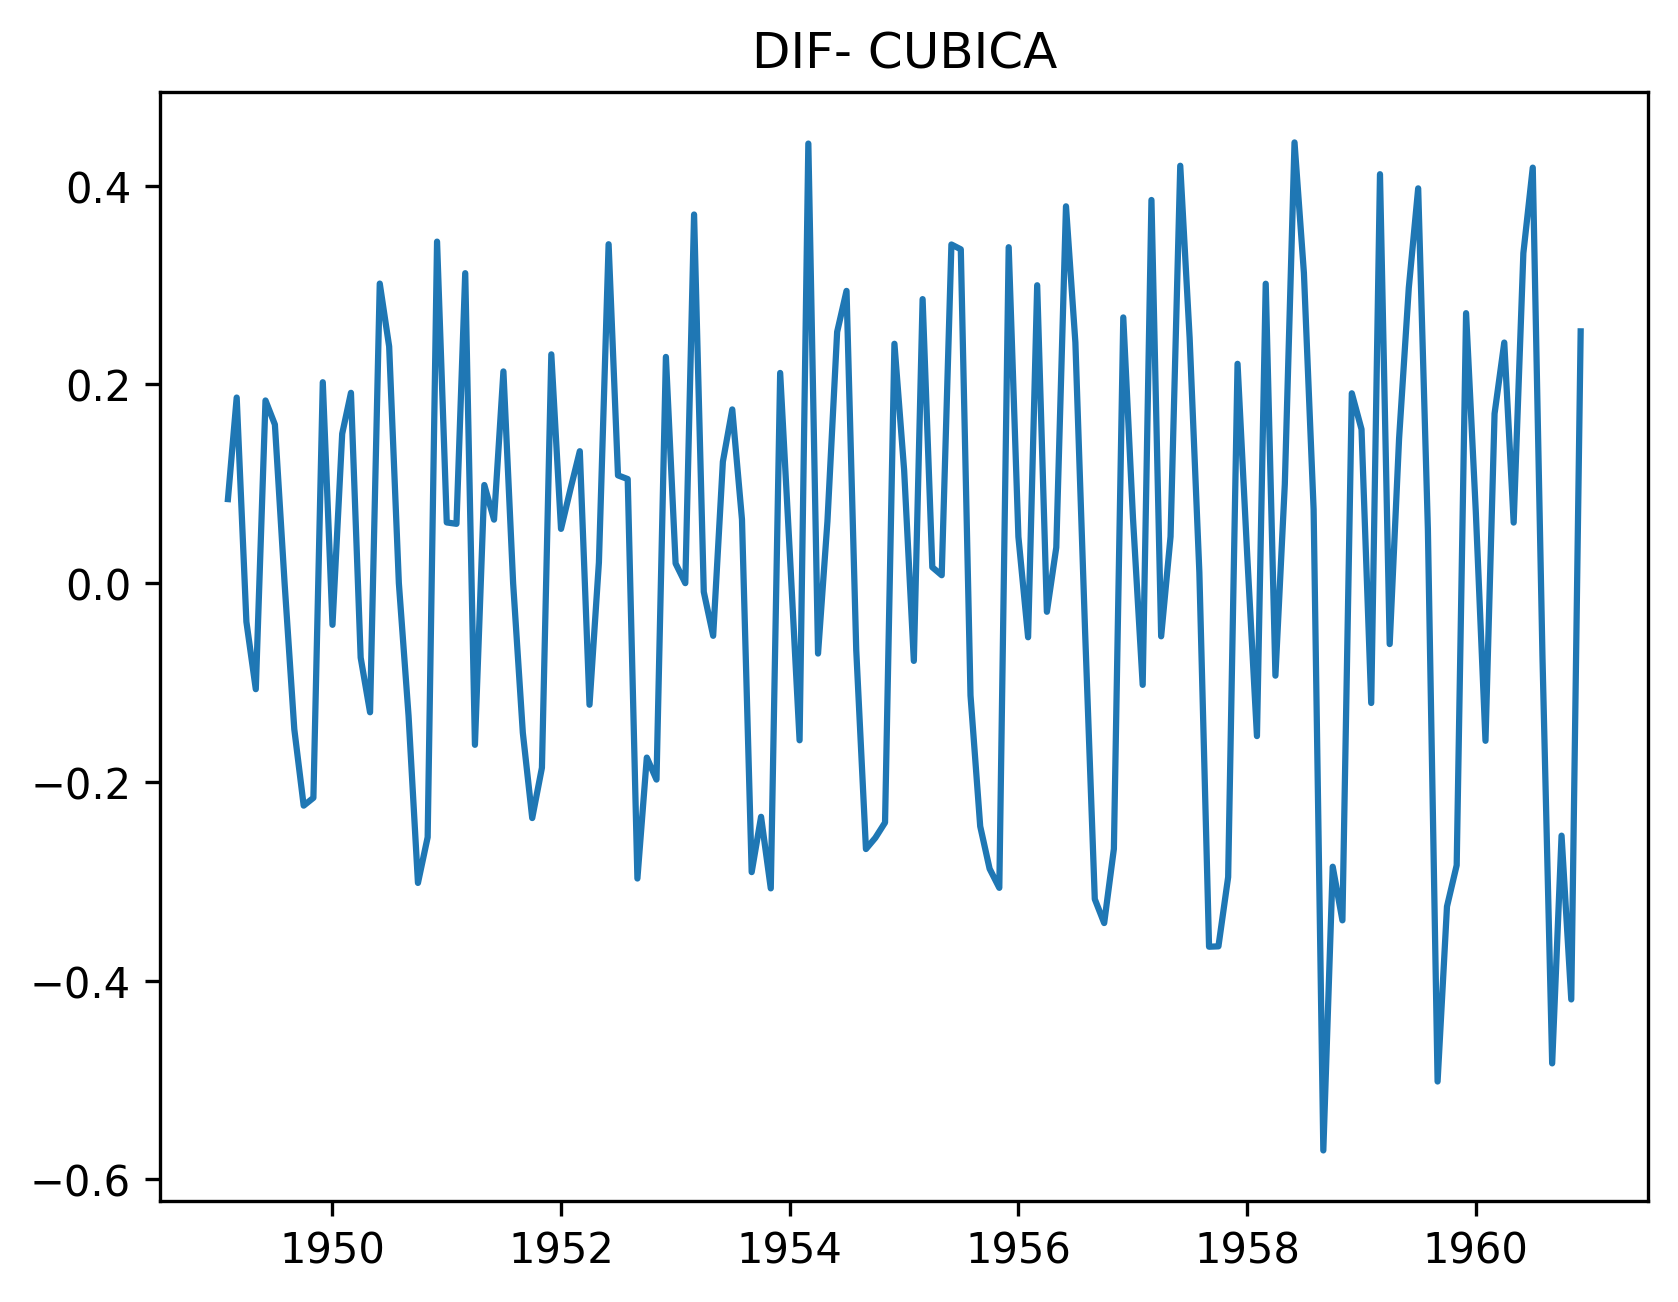

In [30]:
plt.figure(dpi=300)
plt.plot(ser_diff3)
plt.title("DIF- CUBICA")
plt.show()

# Correalaçoes

In [31]:
df=pd.DataFrame()
x=np.linspace(-10,10,100)
df["X"]=x
df["RETA"]=0.7*x + np.random.normal(0,1,100)
df["PARABOLA"]=x*x - 5*x +6 + np.random.normal(0,1,100)
df["Aleat"]=np.random.randint(0,100,100)
df["Trigonometrica"]=np.cos(2*np.pi*x/5)+ np.random.normal(0,1,100)

In [32]:
df

,X,RETA,PARABOLA,Aleat,Trigonometrica
0,-10.000000,-7.565205,156.501093,81,2.002499
1,-9.797980,-7.017327,149.187573,47,1.774816
2,-9.595960,-5.070850,146.954597,51,0.927704
3,-9.393939,-6.066120,143.042749,37,0.966385
4,-9.191919,-7.506043,137.789644,77,-0.688378
...,...,...,...,...,...
95,9.191919,6.702479,42.637549,1,0.959646
96,9.393939,5.346250,45.209508,75,2.205312
97,9.595960,8.513036,50.440077,29,0.711664
98,9.797980,8.415882,52.473917,17,1.161986


In [33]:
df.corr()

,X,RETA,PARABOLA,Aleat,Trigonometrica
X,1.000000,0.972879,-0.693892,0.070043,0.035418
RETA,0.972879,1.000000,-0.679917,0.013611,0.029798
PARABOLA,-0.693892,-0.679917,1.000000,-0.056515,0.017733
Aleat,0.070043,0.013611,-0.056515,1.000000,0.000199
Trigonometrica,0.035418,0.029798,0.017733,0.000199,1.000000


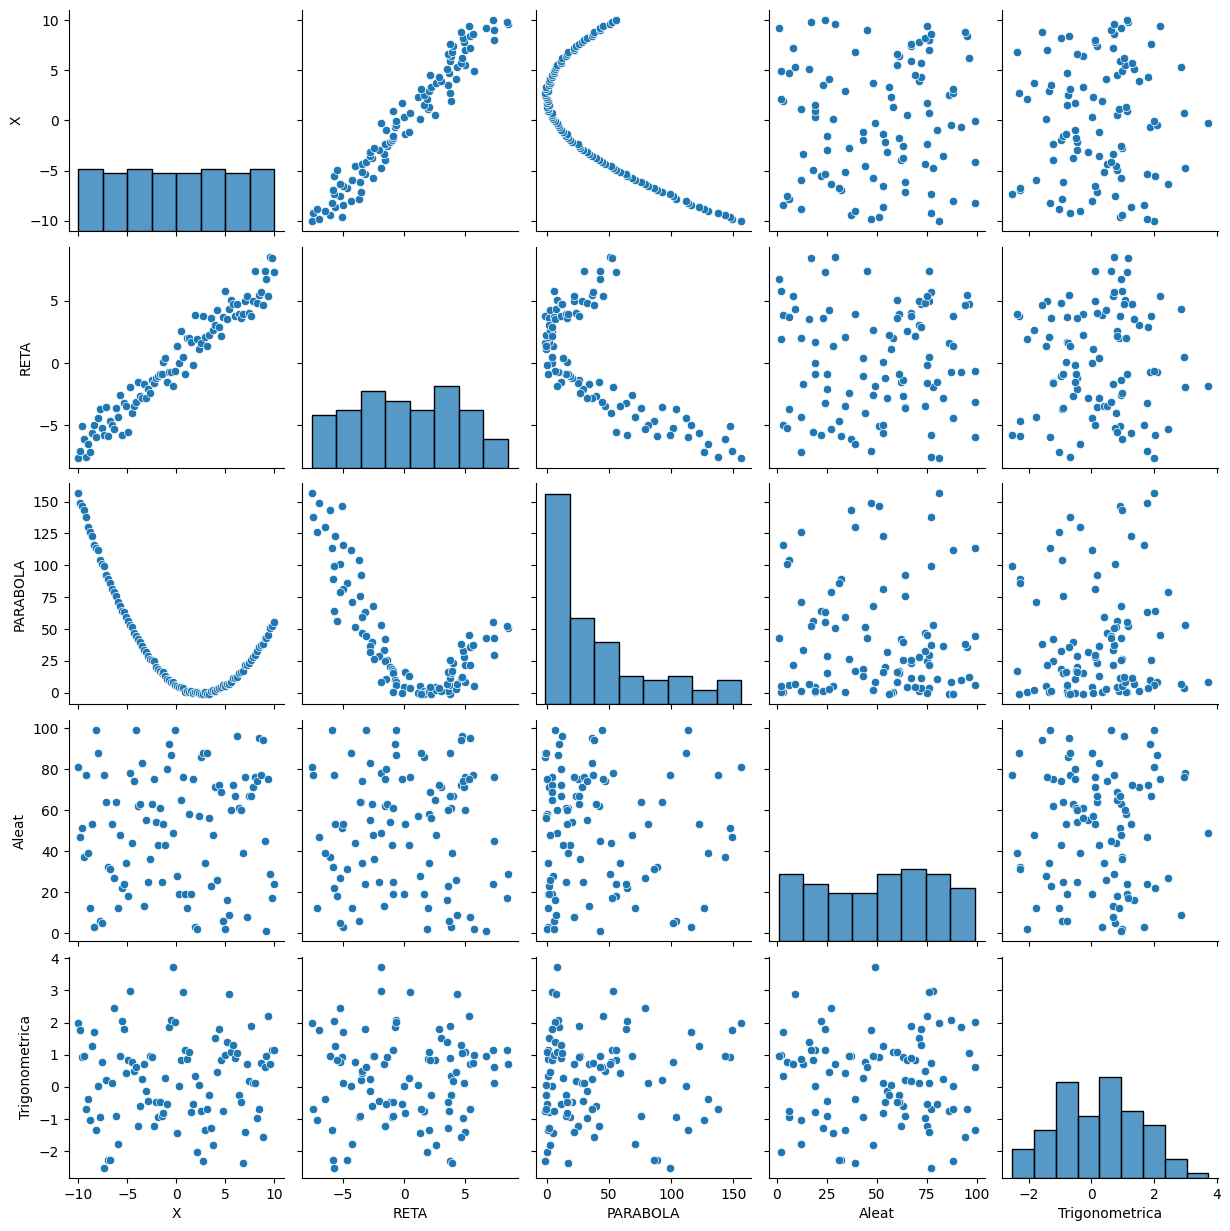

In [34]:
sns.pairplot(df)

In [35]:
df["PARABOLA1"]=df["PARABOLA"].shift(1)

In [36]:
df.corr()

,X,RETA,PARABOLA,Aleat,Trigonometrica,PARABOLA1
X,1.000000,0.972879,-0.693892,0.070043,0.035418,-0.711473
RETA,0.972879,1.000000,-0.679917,0.013611,0.029798,-0.694935
PARABOLA,-0.693892,-0.679917,1.000000,-0.056515,0.017733,0.998650
Aleat,0.070043,0.013611,-0.056515,1.000000,0.000199,-0.094419
Trigonometrica,0.035418,0.029798,0.017733,0.000199,1.000000,-0.020391
PARABOLA1,-0.711473,-0.694935,0.998650,-0.094419,-0.020391,1.000000


In [37]:
df["PARABOLA50"]=df["PARABOLA"].shift(50)

In [38]:
df.corr()

,X,RETA,PARABOLA,Aleat,Trigonometrica,PARABOLA1,PARABOLA50
X,1.000000,0.972879,-0.693892,0.070043,0.035418,-0.711473,-0.985779
RETA,0.972879,1.000000,-0.679917,0.013611,0.029798,-0.694935,-0.849637
PARABOLA,-0.693892,-0.679917,1.000000,-0.056515,0.017733,0.998650,-0.805640
Aleat,0.070043,0.013611,-0.056515,1.000000,0.000199,-0.094419,-0.181172
Trigonometrica,0.035418,0.029798,0.017733,0.000199,1.000000,-0.020391,-0.118281
PARABOLA1,-0.711473,-0.694935,0.998650,-0.094419,-0.020391,1.000000,-0.785263
PARABOLA50,-0.985779,-0.849637,-0.805640,-0.181172,-0.118281,-0.785263,1.000000


In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

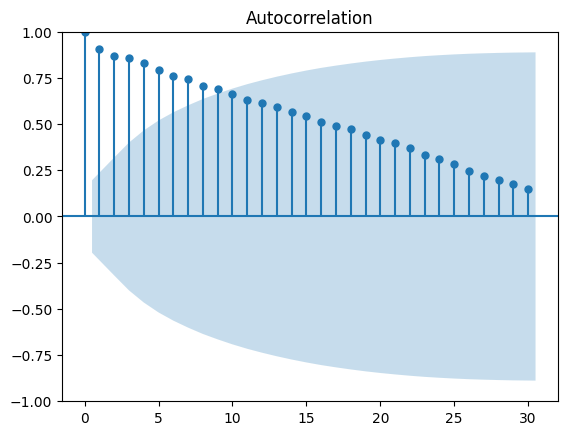

In [40]:
plot_acf(df["RETA"],lags=30)
plt.show()

<Figure size 1920x1440 with 0 Axes>

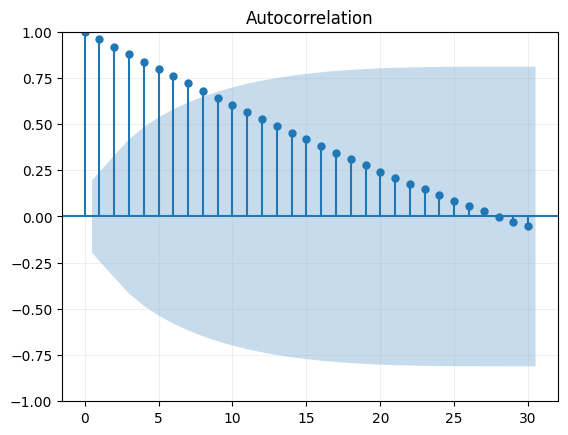

In [41]:
plt.figure(dpi=300)
plot_acf(df["PARABOLA"],lags=30)
plt.grid(alpha=0.2)
plt.show()

<Figure size 1920x1440 with 0 Axes>

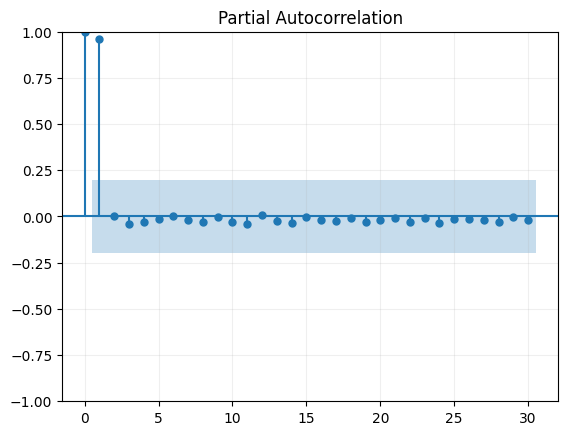

In [42]:
plt.figure(dpi=300)
plot_pacf(df["PARABOLA"],lags=30)
plt.grid(alpha=0.2)
plt.show()

<Figure size 1920x1440 with 0 Axes>

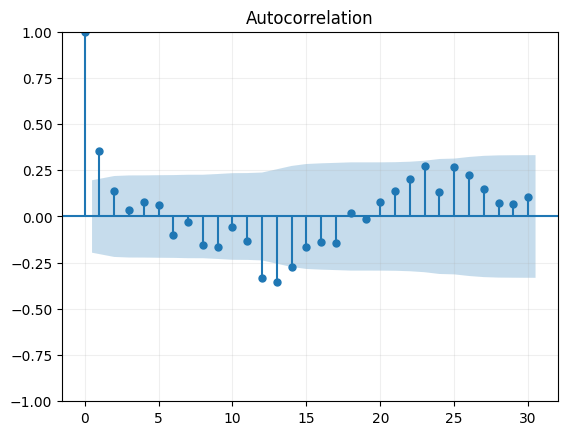

In [43]:
plt.figure(dpi=300)
plot_acf(df["Trigonometrica"],lags=30)
plt.grid(alpha=0.2)
plt.show()

<Figure size 1920x1440 with 0 Axes>

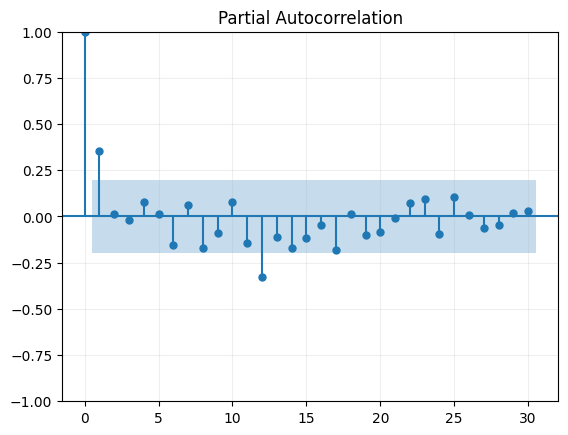

In [44]:
plt.figure(dpi=300)
plot_pacf(df["Trigonometrica"],lags=30)
plt.grid(alpha=0.2)
plt.show()

In [45]:
import statsmodels.api as sm 

In [46]:
df=sm.datasets.co2.load_pandas().data

In [47]:
df

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


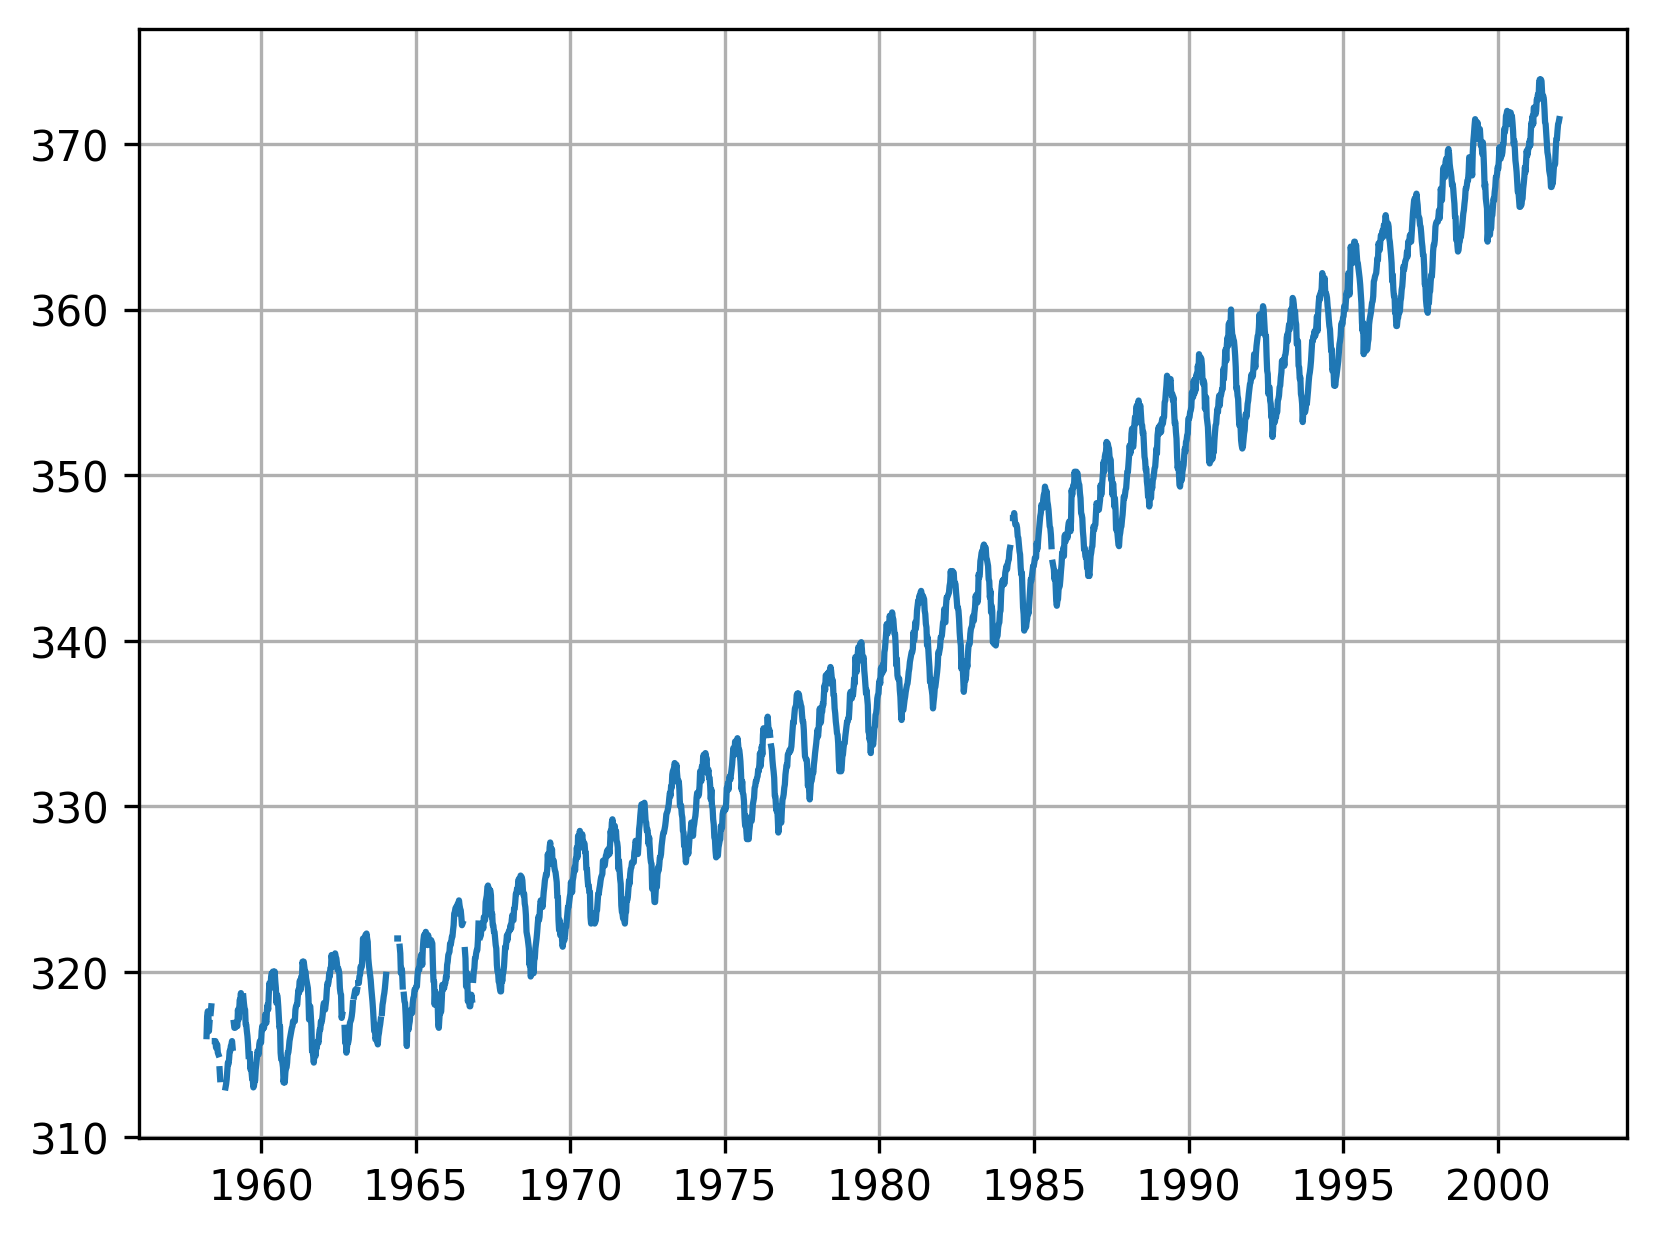

In [48]:
plt.figure(dpi=300)
plt.plot(df)
plt.grid()

In [49]:
testeestacionario(df["co2"].dropna())

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_143/597850919.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série NÃO estacionária'

In [50]:
testenorma(df["co2"].dropna())

'A série NÃO é normal'

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
df.dropna(inplace=True)

In [53]:
decomposicao=seasonal_decompose(df,period=53)

<Figure size 1920x1440 with 0 Axes>

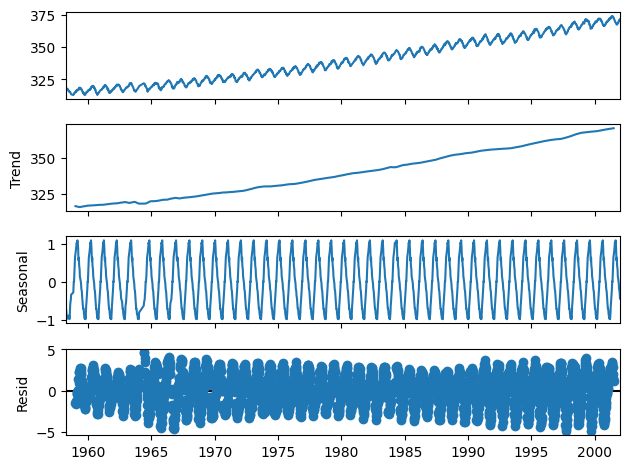

In [54]:
plt.figure(dpi=300)
decomposicao.plot()
plt.show()

In [55]:
testeestacionario(decomposicao.resid.dropna())

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_143/597850919.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série É estacionária'

In [56]:
testenorma(decomposicao.resid.dropna())

'A série NÃO é normal'

# Croostab

In [57]:
df.reset_index(inplace=True)

In [58]:
df.rename(columns={"index":"DATA"},inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATA    2225 non-null   datetime64[ns]
 1   co2     2225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.9 KB


In [60]:
ano=[]
mes=[]
semana=[]
for i in range(len(df)):
    ano.append(df["DATA"].iloc[i].year)
    mes.append(df["DATA"].iloc[i].month)
    semana.append(df["DATA"].iloc[i].week)
    

In [61]:
df["ANO"]=ano
df["MES"]=mes
df["SEMANA"]=semana

In [62]:
df

,DATA,co2,ANO,MES,SEMANA
0,1958-03-29,316.1,1958,3,13
1,1958-04-05,317.3,1958,4,14
2,1958-04-12,317.6,1958,4,15
3,1958-04-19,317.5,1958,4,16
4,1958-04-26,316.4,1958,4,17
...,...,...,...,...,...
2220,2001-12-01,370.3,2001,12,48
2221,2001-12-08,370.8,2001,12,49
2222,2001-12-15,371.2,2001,12,50
2223,2001-12-22,371.3,2001,12,51


In [63]:
cross=pd.crosstab(df["MES"],df["ANO"],values=df["co2"],aggfunc="mean")

<Axes: xlabel='ANO', ylabel='MES'>

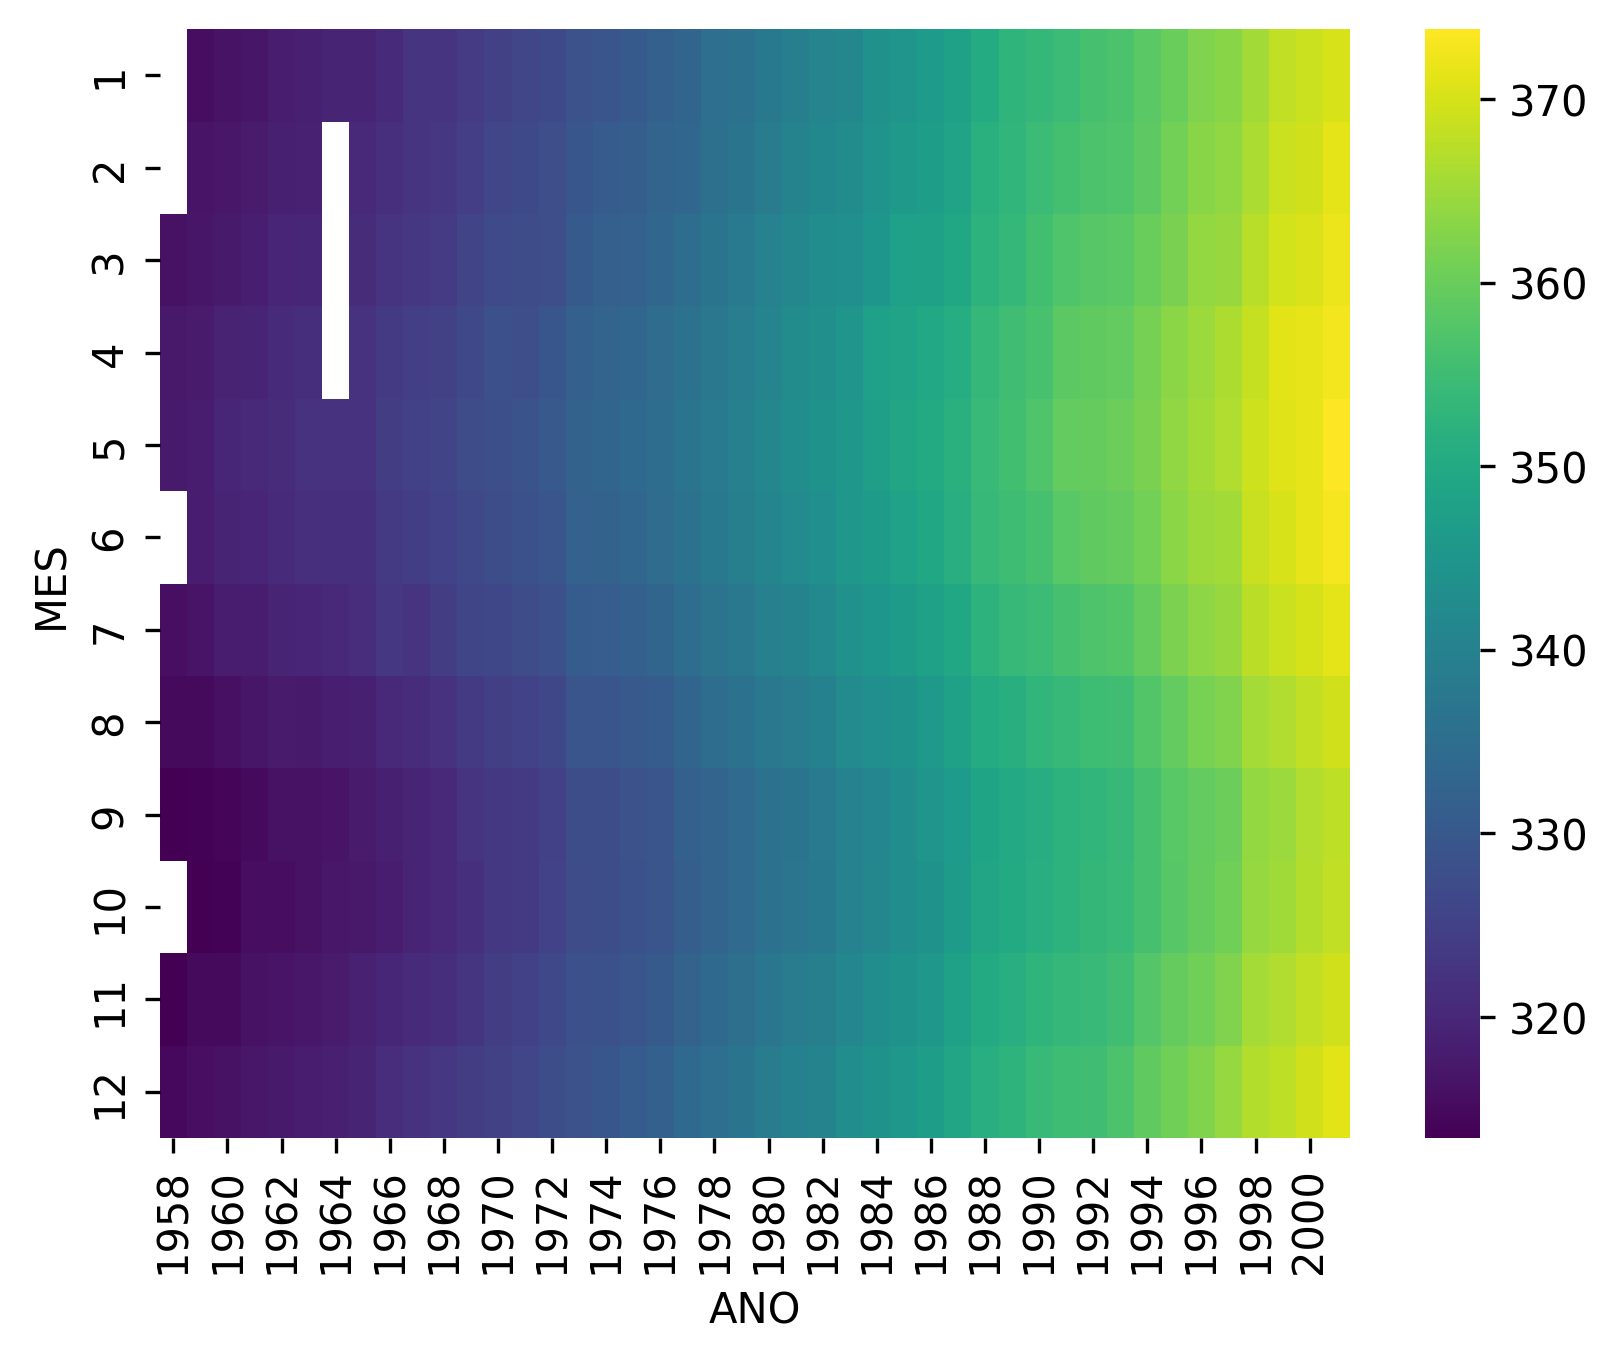

In [64]:
plt.figure(dpi=300)
sns.heatmap(cross,cmap="viridis")